In [32]:
import pandas as pd


PORTFOLIO_STOCKS = ["FPT", "SSI", "VCB", "VHM", "HPG", "GAS", "MSN", "MWG", "GVR", "VCG"]

fin_df = pd.DataFrame()
# Load price data of all stocks in portfolio, in price/1d/ folder, into a new df with a date column, then column name is stock name, and a column is average percentage change of price of all stocks in portfolio
for stock in PORTFOLIO_STOCKS:
    # Add the date to the new df
    price_data = pd.read_csv(f"price/1d/{stock}.csv")
    fin_df["time"] = price_data["time"]
    # Calculate the percentage change of price
    price_data["pct_change"] = price_data["close"].pct_change()

    # Add the average percentage change to the new df
    fin_df[stock] = price_data["pct_change"]

# Calculate the average percentage change of price of all stocks in portfolio by each day
fin_df["avg_pct_change"] = fin_df.iloc[:, 1:].mean(axis=1)

fin_df
# Load crash prediction data
crash_prediction_data = pd.read_csv("crash_predictions.csv")

# Map crash_prediction "Yes/No" to 1/0
crash_prediction_data["crash_prediction"] = crash_prediction_data["crash_prediction"].map({"Yes": 0, "No": 1})

# Take only YYYY-MM-DD from time column
crash_prediction_data["time"] = crash_prediction_data["prediction_date"].str[:10]

# Drop the explanation column
crash_prediction_data = crash_prediction_data.drop(columns=["full_response"])

# Merge crash_prediction_data with fin_df on time column
crash_prediction_data = crash_prediction_data.merge(fin_df[["avg_pct_change", "time"]], on="time", how="left")

# Add a column verdict: if crash_prediction_data["crash"] == 1 and crash_prediction_data["avg_pct_change"] < -0.02 then 1 else 0
crash_prediction_data["verdict"] = crash_prediction_data.apply(
    lambda row: 1 if (row["crash_prediction"] == 0 and row["avg_pct_change"] < -0.02) 
    or (row["crash_prediction"] == 1 and row["avg_pct_change"] > -0.02) 
    else 0,
    axis=1)


crash_prediction_data




,prediction_date,crash_prediction,time,avg_pct_change,verdict
0,2025-02-05T01:00:00+07:00,0,2025-02-05,-0.000775,0
1,2025-02-06T01:00:00+07:00,1,2025-02-06,-0.002680,1
2,2025-02-07T01:00:00+07:00,0,2025-02-07,-0.000946,0
3,2025-02-10T01:00:00+07:00,0,2025-02-10,-0.014179,0
4,2025-02-11T01:00:00+07:00,0,2025-02-11,0.004614,0
5,2025-02-12T01:00:00+07:00,0,2025-02-12,0.002617,0
6,2025-02-13T01:00:00+07:00,1,2025-02-13,0.000958,1
7,2025-02-14T01:00:00+07:00,0,2025-02-14,0.005537,0
8,2025-02-17T01:00:00+07:00,0,2025-02-17,-0.003521,0
9,2025-02-18T01:00:00+07:00,1,2025-02-18,0.005307,1


In [45]:
print("Overall accuracy:", crash_prediction_data["verdict"].mean())

# not crash accuracy
crash_prediction_data_pred_not_crash = crash_prediction_data[crash_prediction_data["crash_prediction"] == 1]
crash_prediction_data_pred_crash = crash_prediction_data[crash_prediction_data["crash_prediction"] == 0]
crash_prediction_data_pred_not_crash.loc[:, "go_up"] = crash_prediction_data_pred_not_crash.loc[:, "avg_pct_change"] >= 0
crash_prediction_data_pred_crash.loc[:, "go_down"] = crash_prediction_data_pred_crash.loc[:, "avg_pct_change"] < 0
print("Accuracy (model predicted not crash, and the stock price not crash < -2%):", crash_prediction_data_pred_not_crash["verdict"].mean())
print("Accuracy (model predicted not crash, and the stock price change is positive):", crash_prediction_data_pred_not_crash["go_up"].mean())
print("Accuracy (model predicted crash, and the stock price change is < -2%):", crash_prediction_data_pred_crash["verdict"].mean())
print("Accuracy (model predicted crash, and the stock price change is negative):", crash_prediction_data_pred_crash["go_down"].mean())




Overall accuracy: 0.5111111111111111
Accuracy (model predicted not crash, and the stock price not crash < -2%): 1.0
Accuracy (model predicted not crash, and the stock price change is positive): 0.75
Accuracy (model predicted crash, and the stock price change is < -2%): 0.12
Accuracy (model predicted crash, and the stock price change is negative): 0.52


C:\Users\Loli\AppData\Local\Temp\ipykernel_9008\946344034.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_prediction_data_pred_not_crash.loc[:, "go_up"] = crash_prediction_data_pred_not_crash.loc[:, "avg_pct_change"] >= 0
C:\Users\Loli\AppData\Local\Temp\ipykernel_9008\946344034.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_prediction_data_pred_crash.loc[:, "go_down"] = crash_prediction_data_pred_crash.loc[:, "avg_pct_change"] < 0


<Figure size 1200x600 with 0 Axes>

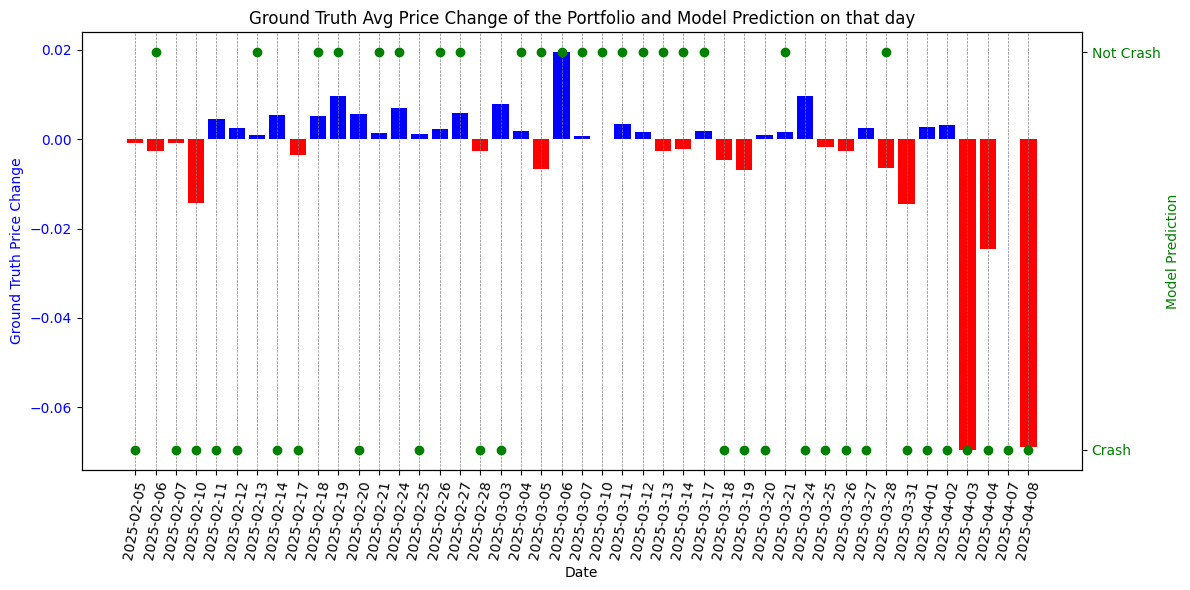

In [27]:
# Plot the avg_pct_change in bar chart, and the verdict as a line in that chart
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for avg_pct_change with color based on value
colors = ['r' if x < 0 else 'b' for x in crash_prediction_data["avg_pct_change"]]
for i in range(len(crash_prediction_data["time"])):
    ax1.axvline(x=crash_prediction_data["time"][i], color='gray', linestyle='--', linewidth=0.5)
ax1.bar(crash_prediction_data["time"], crash_prediction_data["avg_pct_change"], color=colors, label='Average Percentage Change')
ax1.set_xlabel('Date')
ax1.set_ylabel('Ground Truth Price Change', color='b')
ax1.tick_params(axis='y', labelcolor='b')

plt.xticks(rotation=80)

# Create a second y-axis for the verdict
ax2 = ax1.twinx()
ax2.scatter(crash_prediction_data["time"], crash_prediction_data["crash_prediction"], color='g', marker='o')
ax2.set_xlabel('Date')
ax2.set_ylabel('Model Prediction', color='g')
ax2.tick_params(axis='y', labelcolor='g', labelsize=10)
ax2.set_yticks([0, 1])
ax2.set_yticklabels(['Crash', 'Not Crash'])

# Adding titles and labels
plt.title('Ground Truth Avg Price Change of the Portfolio and Model Prediction on that day')
plt.xlabel('Date')

fig.tight_layout()
plt.show()

